In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import joblib
import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.duplicated().sum()

146

In [6]:
df = df.drop_duplicates()
df.shape

(53794, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [8]:
df[(df['x']==0) | (df['y']==0) | (df['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
df.drop(df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index, inplace=True)
df.shape

C:\Users\jcms3\AppData\Local\Temp\ipykernel_137156\2396251808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[(df['x']==0) | (df['y']==0) | (df['z']==0)].index, inplace=True)


(53775, 10)

In [10]:
df.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [11]:
cols_drop=['depth', 'table']
df=df.drop(columns=cols_drop)
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [12]:
df.describe()

,carat,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,3931.220288,5.731579,5.734909,3.539964
std,0.473169,3985.918716,1.118611,1.139451,0.702017
min,0.200000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53775 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   price    53775 non-null  int64  
 5   x        53775 non-null  float64
 6   y        53775 non-null  float64
 7   z        53775 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.7+ MB


In [14]:
rate = 90.87 

df['price'] = df['price'] * rate

df[['price']].head()

,price
0,29623.62
1,29623.62
2,29714.49
3,30350.58
4,30441.45


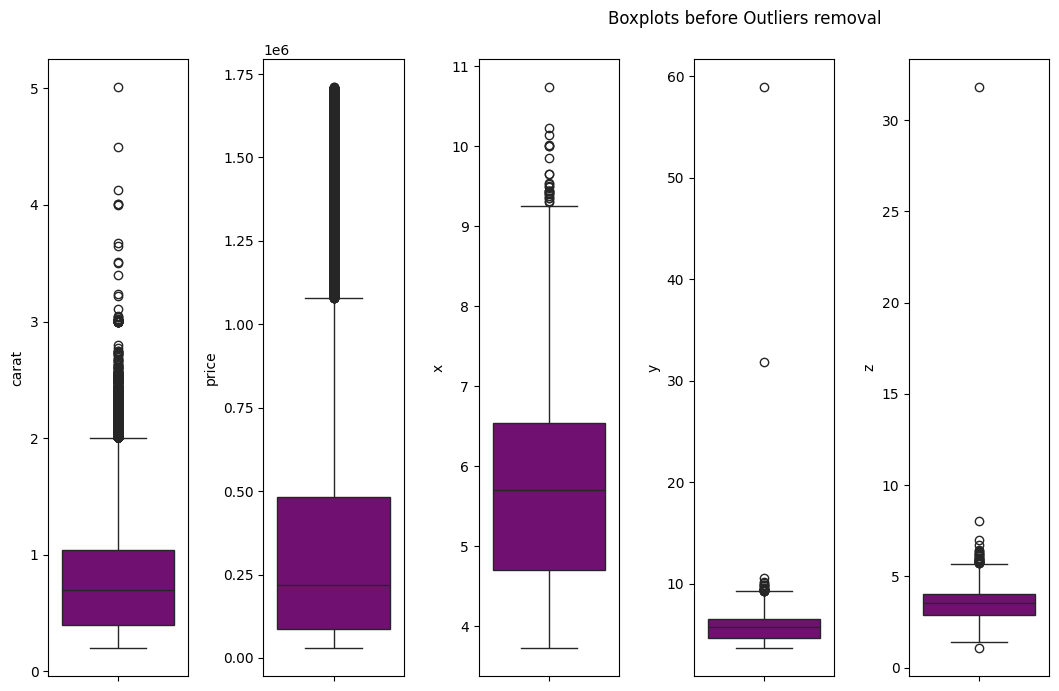

In [15]:
numerical_cols = [ 'carat','price','x','y','z']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots before Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df[numerical_cols[i]],color='purple')
    plt.tight_layout()

In [16]:
df[df['y']>30]

,carat,cut,color,clarity,price,x,y,z
24067,2.00,Premium,H,SI2,1109522.70,8.09,58.9,8.06
49189,0.51,Ideal,E,VS1,188555.25,5.15,31.8,5.12


In [17]:
df[df['z']>10]

,carat,cut,color,clarity,price,x,y,z
48410,0.51,Very Good,E,VS1,179013.9,5.12,5.15,31.8


In [18]:
skewness = df[numerical_cols].skew()
skewness

carat    1.113218
price    1.618220
x        0.396908
y        2.470200
z        1.589309
dtype: float64

In [19]:
outlier_counts={}
numerical_cols=['carat','price','y','z']
for col in numerical_cols:
    Q1 = df[col].quantile(0.25) 
    Q3 = df[col].quantile(0.75)  
    IQR = Q3 - Q1 

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(col)
    print(lower,upper)
    outlier_mask = (df[col] < lower) | (df[col] > upper)
    outlier_counts[col] = outlier_mask.sum()
print(outlier_counts)


carat
-0.5599999999999999 2.0
price
-509644.395 1079853.645
y
1.9899999999999993 9.27
z
1.23 5.710000000000001
{'carat': 1867, 'price': 3520, 'y': 22, 'z': 29}


In [20]:
(1867+3520+47)/53794

0.10101498308361527

In [21]:
df1= df.copy()
df1.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,29623.62,3.95,3.98,2.43
1,0.21,Premium,E,SI1,29623.62,3.89,3.84,2.31
2,0.23,Good,E,VS1,29714.49,4.05,4.07,2.31
3,0.29,Premium,I,VS2,30350.58,4.20,4.23,2.63
4,0.31,Good,J,SI2,30441.45,4.34,4.35,2.75


In [22]:
numerical_cols = ['carat', 'price', 'y', 'z']

for col in numerical_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]

print("Original shape:", df.shape)
print("After outlier removal shape:", df1.shape)

Original shape: (53775, 8)
After outlier removal shape: (49376, 8)


In [23]:
skewness = df1[numerical_cols].skew()
skewness

carat    0.657875
price    1.125809
y        0.212450
z        0.218858
dtype: float64

In [24]:
49376/53775

0.9181961878196188

In [25]:
z_scores = stats.zscore(df1['x'])

outlier_mask = np.abs(z_scores) > 3
outliers_x = df1[outlier_mask]

print("Number of outliers in x:", outlier_mask.sum())

Number of outliers in x: 0


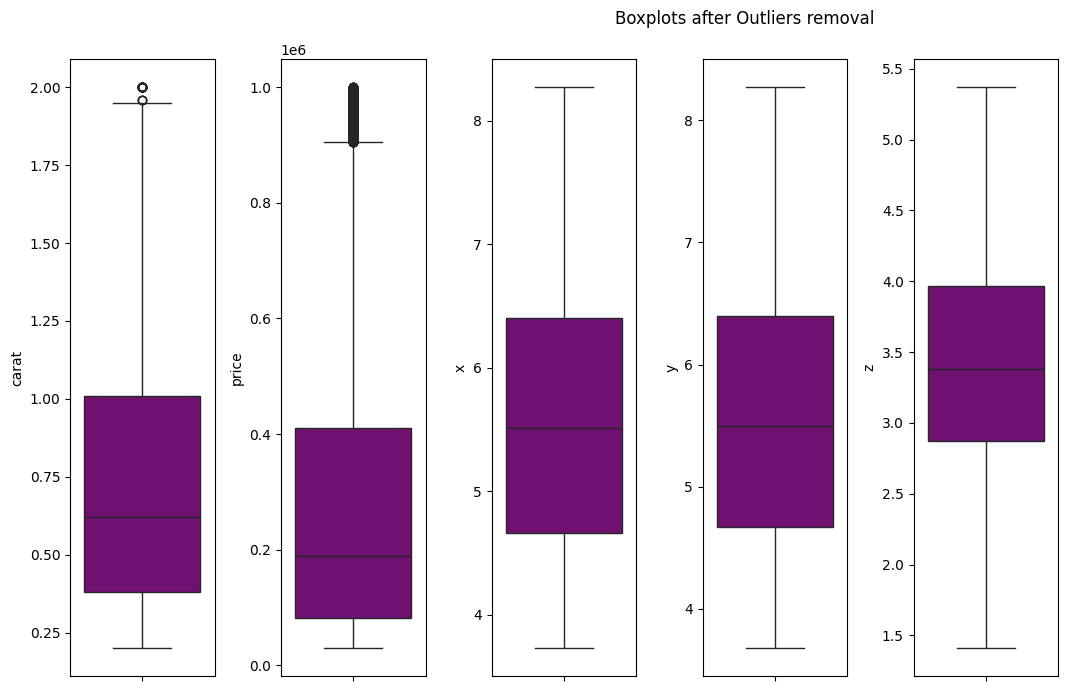

In [26]:
numerical_cols = [ 'carat','price','x','y','z']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df1[numerical_cols[i]],color='purple')
    plt.tight_layout()

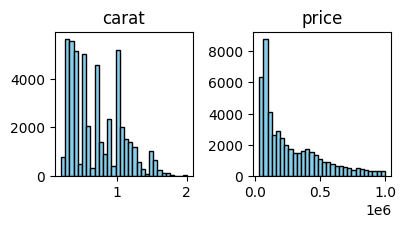

In [27]:
skewed_cols = skewness[abs(skewness) > 0.5].index

plt.figure(figsize=(16, 8))
for i, col in enumerate(skewed_cols, 1):
    plt.subplot(4, 8, i)  
    plt.hist(df1[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()

In [28]:
def categorize_carat(carat):
    if carat < 0.5:
        return 'Light'
    elif carat <= 1.5:
        return 'Medium'
    else:
        return 'Heavy'

df1['carat_category'] = df1['carat'].apply(categorize_carat)

df1.head()

,carat,cut,color,clarity,price,x,y,z,carat_category
0,0.23,Ideal,E,SI2,29623.62,3.95,3.98,2.43,Light
1,0.21,Premium,E,SI1,29623.62,3.89,3.84,2.31,Light
2,0.23,Good,E,VS1,29714.49,4.05,4.07,2.31,Light
3,0.29,Premium,I,VS2,30350.58,4.20,4.23,2.63,Light
4,0.31,Good,J,SI2,30441.45,4.34,4.35,2.75,Light


In [29]:
n_col = ['carat', 'price']
for col in n_col:
    log_data = np.log1p(df1[col].clip(lower=0))
    sqrt_data = np.sqrt(df1[col].clip(lower=0)) 

    log_skew = log_data.skew()
    sqrt_skew = sqrt_data.skew()
    orig_skew = df1[col].skew()
    
    print(f"Column: {col}")
    print(f"Original skewness: {orig_skew:.4f}")
    print(f"Log transform skewness: {log_skew:.4f}")
    print(f"Sqrt transform skewness: {sqrt_skew:.4f}")
    print("-" * 50)

Column: carat
Original skewness: 0.6579
Log transform skewness: 0.3657
Sqrt transform skewness: 0.3147
--------------------------------------------------
Column: price
Original skewness: 1.1258
Log transform skewness: 0.0290
Sqrt transform skewness: 0.5683
--------------------------------------------------


In [30]:
df1[['carat', 'price']] = np.sqrt(df1[['carat', 'price']])

df1.head()

,carat,cut,color,clarity,price,x,y,z,carat_category
0,0.479583,Ideal,E,SI2,172.115136,3.95,3.98,2.43,Light
1,0.458258,Premium,E,SI1,172.115136,3.89,3.84,2.31,Light
2,0.479583,Good,E,VS1,172.378914,4.05,4.07,2.31,Light
3,0.538516,Premium,I,VS2,174.214179,4.20,4.23,2.63,Light
4,0.556776,Good,J,SI2,174.474783,4.34,4.35,2.75,Light


### eda

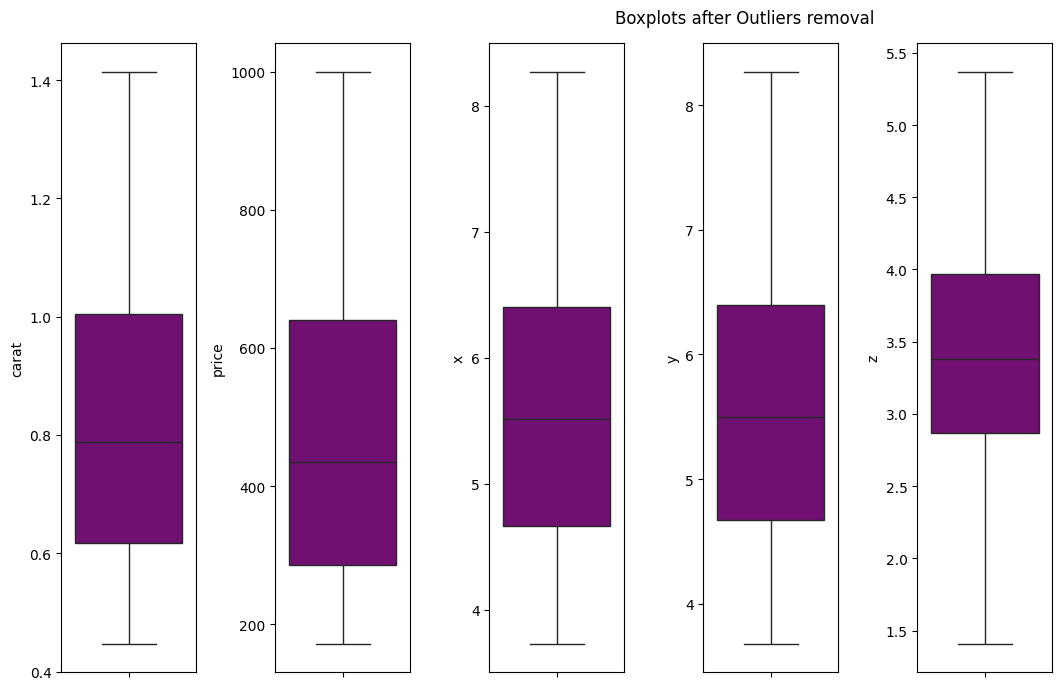

In [31]:
numerical_cols = [ 'carat','price','x','y','z']

plt.figure(figsize=(15, 7))
plt.suptitle("Boxplots after Outliers removal")
for i in range(0, len(numerical_cols)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df1[numerical_cols[i]],color='purple')
    plt.tight_layout()

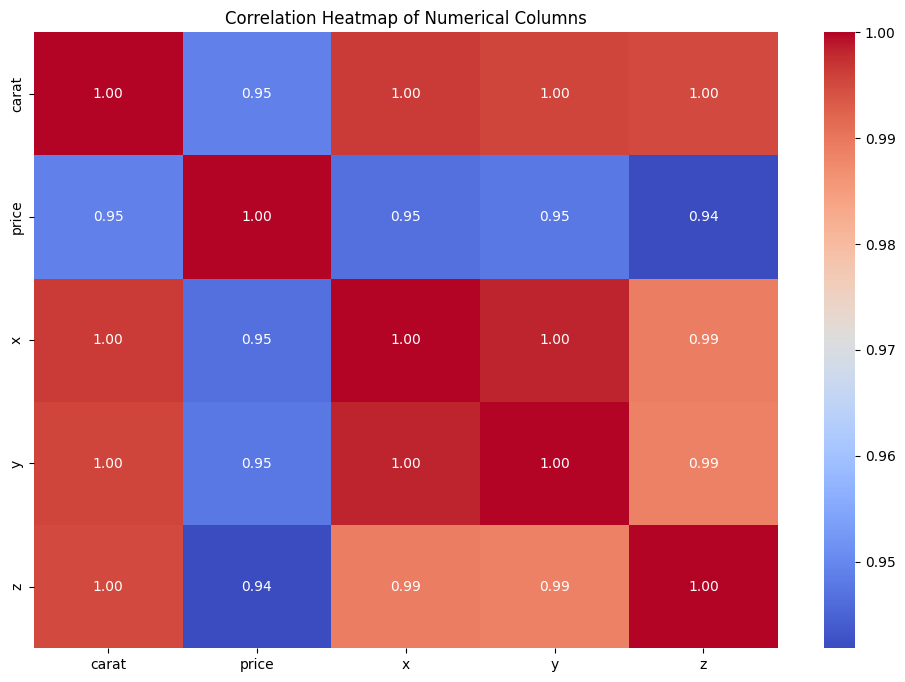

In [32]:
corr_matrix = df1[numerical_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

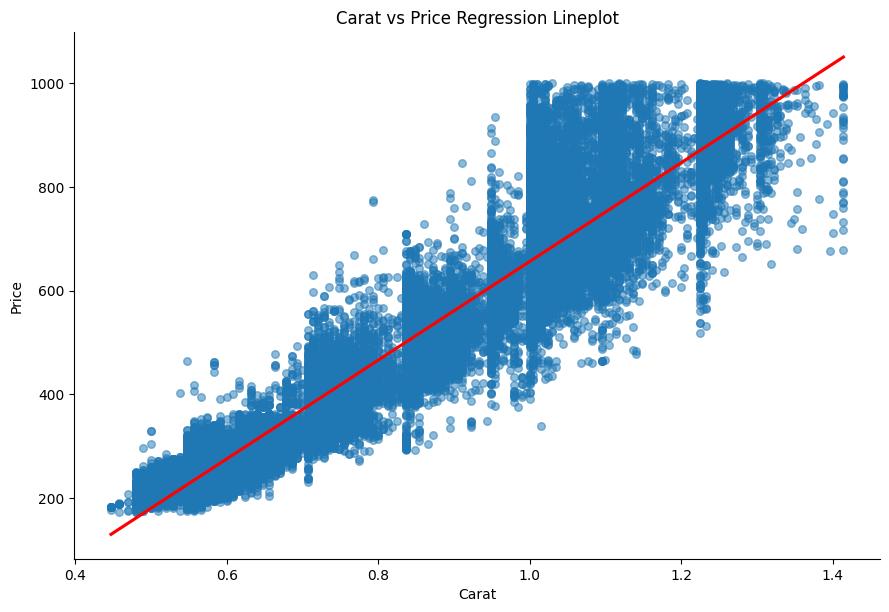

In [33]:
sns.lmplot(x='carat', y='price', data=df1, height=6, aspect=1.5, scatter_kws={'alpha':0.5, 's':30}, line_kws={'color':'red'})
plt.title("Carat vs Price Regression Lineplot")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()


### categorical

In [34]:
cat_col = ['cut','color','clarity','carat_category']

value_counts = {col: df1[col].value_counts() for col in cat_col}

for col, counts in value_counts.items():
    print(f"\nColumn: {col}")
    print(counts)


Column: cut
cut
Ideal        20059
Premium      12189
Very Good    11132
Good          4561
Fair          1435
Name: count, dtype: int64

Column: color
color
G    10339
E     9300
F     8868
H     7411
D     6429
I     4655
J     2374
Name: count, dtype: int64

Column: clarity
clarity
SI1     12041
VS2     11231
SI2      8012
VS1      7582
VVS2     4748
VVS1     3473
IF       1651
I1        638
Name: count, dtype: int64

Column: carat_category
carat_category
Medium    30013
Light     17608
Heavy      1755
Name: count, dtype: int64


In [35]:
cut_order = [['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
color_order = [['D', 'E', 'F', 'G', 'H', 'I', 'J']]
clarity_order = [['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
carat_order = [['Light', 'Medium', 'Heavy']]

ord_enc = OrdinalEncoder(categories=[cut_order[0], color_order[0], clarity_order[0], carat_order[0]])

df1[['cut_encoded', 'color_encoded', 'clarity_encoded', 'carat_encoded']] = ord_enc.fit_transform(
    df1[['cut', 'color', 'clarity', 'carat_category']]
)

df1.head()

,carat,cut,color,clarity,price,x,y,z,carat_category,cut_encoded,color_encoded,clarity_encoded,carat_encoded
0,0.479583,Ideal,E,SI2,172.115136,3.95,3.98,2.43,Light,4.0,1.0,1.0,0.0
1,0.458258,Premium,E,SI1,172.115136,3.89,3.84,2.31,Light,3.0,1.0,2.0,0.0
2,0.479583,Good,E,VS1,172.378914,4.05,4.07,2.31,Light,1.0,1.0,4.0,0.0
3,0.538516,Premium,I,VS2,174.214179,4.20,4.23,2.63,Light,3.0,5.0,3.0,0.0
4,0.556776,Good,J,SI2,174.474783,4.34,4.35,2.75,Light,1.0,6.0,1.0,0.0


In [36]:
df1 = df1.drop(columns=['cut','color','clarity','carat_category'])
df1.head()

,carat,price,x,y,z,cut_encoded,color_encoded,clarity_encoded,carat_encoded
0,0.479583,172.115136,3.95,3.98,2.43,4.0,1.0,1.0,0.0
1,0.458258,172.115136,3.89,3.84,2.31,3.0,1.0,2.0,0.0
2,0.479583,172.378914,4.05,4.07,2.31,1.0,1.0,4.0,0.0
3,0.538516,174.214179,4.20,4.23,2.63,3.0,5.0,3.0,0.0
4,0.556776,174.474783,4.34,4.35,2.75,1.0,6.0,1.0,0.0


### feature selection

           Feature  Importance
2                y    0.661568
0            carat    0.237232
6  clarity_encoded    0.045307
5    color_encoded    0.021821
7    carat_encoded    0.019138
1                x    0.008391
3                z    0.004362
4      cut_encoded    0.002181


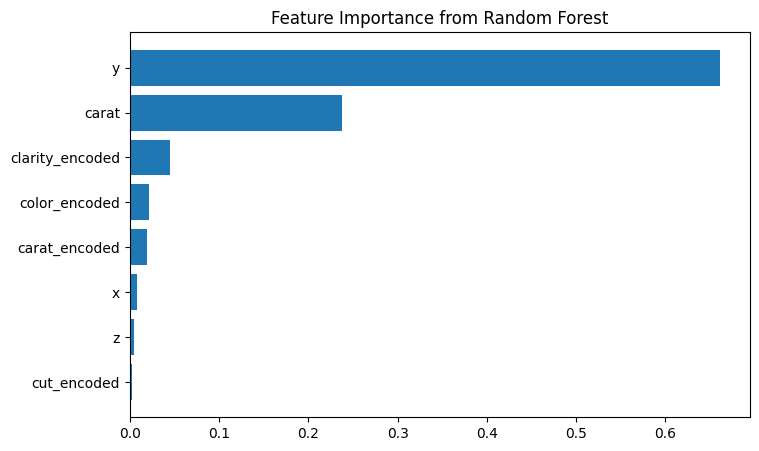

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df1[['carat','x','y','z','cut_encoded','color_encoded','clarity_encoded','carat_encoded']]
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns

feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importances)

plt.figure(figsize=(8,5))
plt.barh(feat_importances['Feature'], feat_importances['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance from Random Forest")
plt.show()

### model building

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df1.drop('price', axis=1)
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'DecisionTree': DecisionTreeRegressor(random_state=42),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

pd.DataFrame(results).T


,MAE,MSE,RMSE,R2
LinearRegression,33.555186,2032.700430,45.085479,0.954977
DecisionTree,20.273583,1018.844624,31.919346,0.977433
RandomForest,15.207660,558.029336,23.622645,0.987640
XGBoost,15.324384,537.841734,23.191415,0.988087


### ann

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

X = df1[['carat','x','y','z','cut_encoded','color_encoded','clarity_encoded']]
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train_scaled, y_train, validation_split=0.2,epochs=50, batch_size=32,callbacks=[early_stop], verbose=1)
y_pred = model.predict(X_test_scaled).flatten()


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("ANN Regression Results")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)





Epoch 1/50

988/988 [==============================] - 2s 2ms/step - loss: 61644.6289 - val_loss: 3485.3420
Epoch 2/50
988/988 [==============================] - 1s 1ms/step - loss: 2182.0979 - val_loss: 1639.9340
Epoch 3/50
988/988 [==============================] - 1s 1ms/step - loss: 1526.2670 - val_loss: 1419.3284
Epoch 4/50
988/988 [==============================] - 1s 1ms/step - loss: 1387.6171 - val_loss: 1319.9152
Epoch 5/50
988/988 [==============================] - 2s 2ms/step - loss: 1308.3719 - val_loss: 1266.5266
Epoch 6/50
988/988 [==============================] - 1s 1ms/step - loss: 1240.7864 - val_loss: 1206.3820
Epoch 7/50
988/988 [==============================] - 1s 1ms/step - loss: 1173.7062 - val_loss: 1141.9930
Epoch 8/50
988/988 [==============================] - 2s 2ms/step - loss: 1120.8502 - val_loss: 1116.7971
Epoch 9/50
988/988 [==============================] - 1s 1ms/step - loss: 1087.0063 - val_loss: 1056.9498
Epoch 10/50
988/988 [=====================

### xgboost

In [43]:
import pickle

In [44]:
best_model = models['XGBoost']
with open('diamond_model1.pkl', 'wb') as f:
    pickle.dump(best_model, f)

### clustering

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

X = df1.drop(columns=['price'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sil_scores = {}

In [45]:
joblib.dump(scaler, "cluster_scaler.pkl")

['cluster_scaler.pkl']

In [38]:
for k in range(2, 10): 
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    sil_scores[k] = silhouette_score(X_scaled, labels)

best_k = max(sil_scores, key=sil_scores.get)
print("Best number of clusters:", best_k)
print("Silhouette scores:", sil_scores)

Best number of clusters: 2
Silhouette scores: {2: 0.39544560793497885, 3: 0.2977479584471237, 4: 0.27869823433162483, 5: 0.23750043255712777, 6: 0.23215440721271657, 7: 0.23187994474848073, 8: 0.23383561238936879, 9: 0.2319321875279586}


In [39]:
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
df1['cluster'] = best_kmeans.fit_predict(X_scaled)

In [41]:
cluster_summary = (
    df1.groupby("cluster")
       .agg({
           "carat_encoded": "mean",
           "price": "mean"
       })
       .reset_index()
)

(cluster_summary)

,cluster,carat_encoded,price
0,0,1.069673,649.641378
1,1,0.272006,300.292039


In [46]:
with open("best_kmean1.pkl", "wb") as f:
    pickle.dump(best_kmeans, f)

In [47]:
def name_cluster(row):
    if row["carat_encoded"] >= 0.9 and row["price"] >= 630:
        return "Premium Heavy Diamonds"
    elif row["carat_encoded"] <= 0.3 and row["price"] <= 400:
        return "Affordable Small Diamonds" 
 

cluster_summary["cluster_name"] = cluster_summary.apply(name_cluster, axis=1)


In [48]:
cluster_summary

,cluster,carat_encoded,price,cluster_name
0,0,1.069673,649.641378,Premium Heavy Diamonds
1,1,0.272006,300.292039,Affordable Small Diamonds


In [49]:
cluster_name_map = {
    0: "Premium Heavy Diamonds",
    1: "Affordable Small Diamonds"
}